# Webscraping in Python

In Python kunnen we nu op allerlei manieren data importeren en nadien verwerken:files(csv,excel,..) of databases (SQL of NoSQL databases) maar nog meer data is terug te vinden vandaag op het web. We hebben toegang tot sociale netwerken, websites en daar zijn massa's gegevens voorradig. In 2019 namen de servers van Microsoft, Amazon, Google en Facebook https://starry.com/blog/inside-the-internet/how-big-is-the-interneternet/how-big-is-the-internet voor 120 miljard Gigabyte data in beslag. De hoeveelheid data op het internet groeit nog steeds, vandaar dat technieken om die data te importeren aan belang toenemen.

In Python kunnen we gebruik maken van verschillende technieken om data van het web te halen.
Voor de sociale netwerken zijn er meestal API en soms specifieke modules die via deze API's werken, zoals bijvoorbeeld Tweepy (voor Twitter). 
Verder kunnen we ook data van websites halen via "webscraping" hierbij komen, modules zoals BeautifulSoup en Scrapy van pas. Scrapy is hierbij het meest aangewezen als we meerdere websites willen scrapen. Voor 1 website te scrapen lijkt BeautifulSoup een handige tool.
Recent is er een beta-versie van een nieuw pakket Scrapera, hierbij worden onmiddelijk oplossingen geboden voor het scrapen van veel gebruikte toepassingen zoals bijvoorbeeld het scrapen van Youtube, Yahoo Stockexchange,...
Naast de technische aspecten zijn er ook de juridische en ethische aspecten die we in beschouwing moeten nemen.

Doelstellingen:

Je kan de gewenste informatie van een eenvoudige html file halen.
Je kan de gewenste informatie van een website halen.
Je kan de documentatie gebruiken van Beautiful Soup.
Je kan door gebruik te maken van de browser om de HTML code beter te begrijpen.

##  BeautifulSoup

In de soep die we eten zien we een wir war van verschillende ingrediënten en dat is ongestructureerd. Als we de bron bekijken van veel websites zien we dat dit dikwijls ook een onduidelijke structuur heeft. Vandaar dat de naam van het pakket dat websites die geschreven zijn in HTML en XML code BeautifulSoup heet.

De versie die we hier gaan gebruiken is versie 4.
Voor de documentatie van dit pakket kijken we hier:
https://www.crummy.com/software/BeautifulSoup/bs4/doc/


In [42]:
from bs4 import BeautifulSoup # importeer BeautifulSoup uit het pakket BeautifulSoup versie 4

#in een eerste voorbeeld gaan we informatie scrapen van een eenvoudige html file 
with open("website.html") as file:
    content=file.read()
soep=BeautifulSoup(content,'html.parser')    
print(soep)

# we kunnen nu op het object soep allerlei tags loslaten probeer er enkele uit
#  ul,strong,b,head, title

print(soep.strong)

#we kunnen zelfs combinaties gebruiken van attributen

print(soep.h1)



<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>Voorstelling </title>
</head>
<body>
<h1 id="name">Rony Baekeland</h1>
<p><b>Proefles Python i.v.m. webscraping  voor <strong><a href="https://www.Syntra.be/">Syntra</a></strong>.</b></p>
<p>Enkele interessante bronnen:</p>
<h3 class="heading">Boeken en weblinks:</h3>
<ul> <li><p>Jake VanderPlas,"Python Datascience Handbook", uitgever: O'Reilly</p></li>
<li><a class="course" href="https://www.datacamp.com">Datacamp</a></li>
<li><a class="course" href="https://www.udemy.com">100 Days of Code - The Complete Python Bootcamp</a></li>
<li><a class="doc" href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">Beautiful Soup Documentation</a></li>
</ul><h3 class="heading">Andere sites</h3>
<a href="https://github.com/ronybaekeland/datascienceprojects">Mijn GitHub Site </a>
<a class="mail" href="mailto:r.baekeland@gmail.com">Contact</a>
</body>
</html>
<strong><a href="https://www.Syntra.be/">Syntra</a></strong>
<h1 id="name">

#### Oefening 1:
Geef de eerste h3 weer van de website.html
Geef de eerste tekst weer die in bold staat.


Tot hiertoe kregen we telkens het eerste element dat we vonden in de file, maar soms willen we een specifieke link of paragraaf of willen we bijvoorbeeld alle links verkrijgen. Hoe doen we dit?
Dan komt de methodes find() en find_all() op de proppen.
Stel we willen alle hyperlinks bekomen in het document?

In [15]:
hyperlinks=soep.find_all(name="a")
print(hyperlinks)

[<a href="https://www.Syntra.be/">Syntra</a>, <a class="course" href="https://www.datacamp.com">Datacamp</a>, <a class="course" href="https://www.udemy.com">100 Days of Code - The Complete Python Bootcamp</a>, <a class="doc" href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">Beautiful Soup Documentation</a>, <a href="https://github.com/ronybaekeland/datascienceprojects">Mijn GitHub Site </a>, <a class="mail" href="mailto:r.baekeland@gmail.com">Contact</a>]


We krijgen hier een lijst van hyperlinks en de bijbehorende tekst. Maar hoe kunnen we nu enkel de links of enkel de tekst bekomen?

In [16]:
# print enkel de tekst van de link uit
for link in hyperlinks:
    print(link.getText())

# maak een lijst met enkele de teksten

# maak een lijst van hyperlinks

Syntra
Datacamp
100 Days of Code - The Complete Python Bootcamp
Beautiful Soup Documentation
Mijn GitHub Site 
Contact


In [30]:
tekst= [tag.getText() for tag in hyperlinks] 
print(tekst)
enkel_links=[tag.get("href") for tag in hyperlinks]
print(enkel_links)

['Syntra', 'Datacamp', '100 Days of Code - The Complete Python Bootcamp', 'Beautiful Soup Documentation', 'Mijn GitHub Site ', 'Contact']
['https://www.Syntra.be/', 'https://www.datacamp.com', 'https://www.udemy.com', 'https://www.crummy.com/software/BeautifulSoup/bs4/doc/', 'https://github.com/ronybaekeland/datascienceprojects', 'mailto:r.baekeland@gmail.com']


#### Oefening 2: 
Maak een lijst met alle paragrafen
Maak een lijst met alle tekst die staat tussen de paragrafen
Maak een lijst met alle h3
Maak een lijst met enkel de tekst van h3
Maak een lijst van alle tags van hyperlinks die verwijzen naar cursussen.

Als we op zoek zijn naar een bepaalde hyperlink dan kunnen we dit verder aanduiden. Bijvoorbeeld stel dat we naar alle hyperlinks zoeken die te maken hebben met documentatie. We inspecteren het element 'Beautiful Soup Documentation' door de rechtermuistoets te gebruiken en 'Element inspecteren' te kiezen bij Firefox (Voor Chrome is dit gewoon 'Inspecteren'). Firefox zal nu inzoemen op de HTML code van dit element.

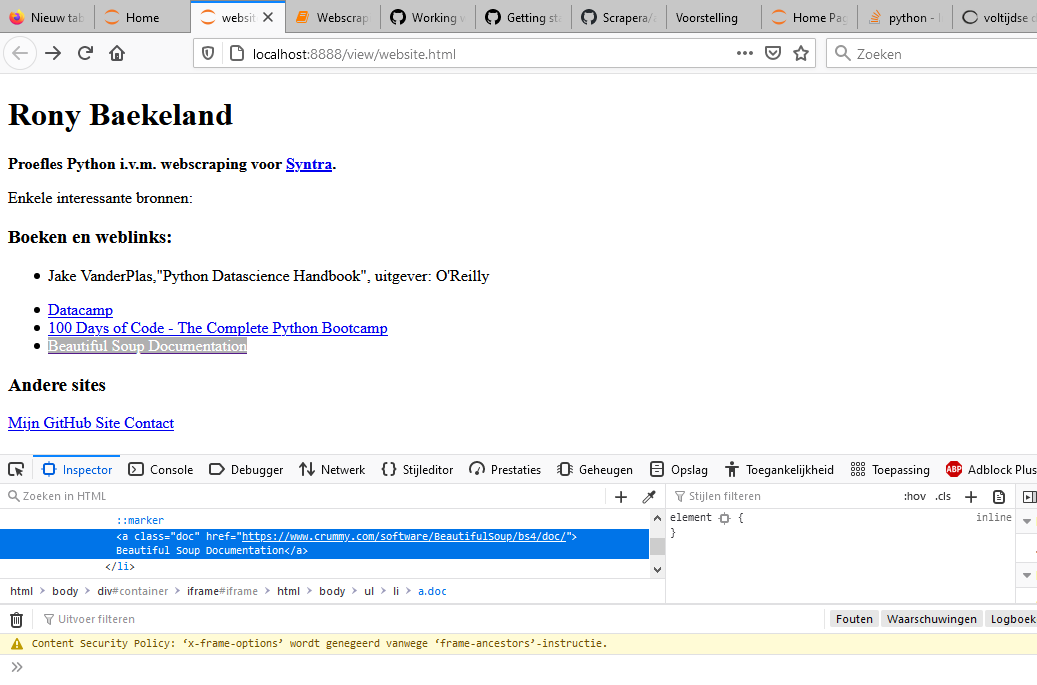

We zien dat we dit element kunnen terugvinden omdat die de class "doc" heeft.
Of in Chrome gaan we kijken hoe we iets te weten komen over de prijs-tag in een Syntra cursus.


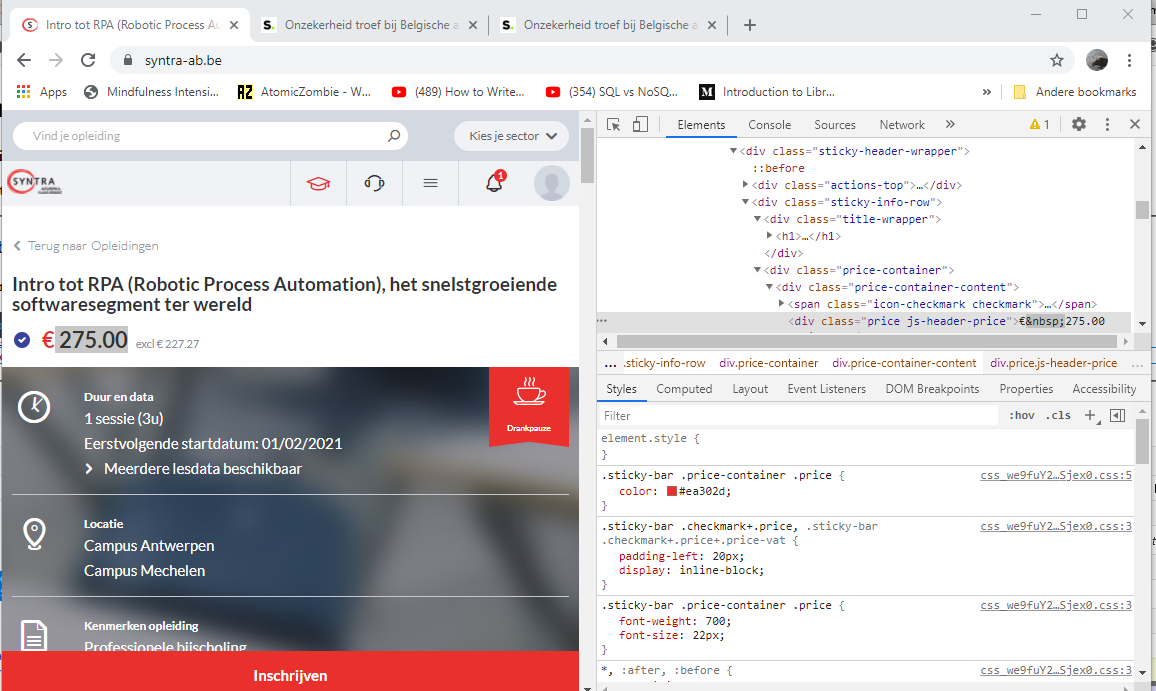



#### Oefening 3
Ga naar de Syntra website en inspecteer een element. In Google en Firefox.

In [34]:
#doc_links=


#print(doc_links)


<a class="doc" href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">Beautiful Soup Documentation</a>
[<a class="course" href="https://www.datacamp.com">Datacamp</a>, <a class="course" href="https://www.udemy.com">100 Days of Code - The Complete Python Bootcamp</a>]


Als alternatief voor find en find_all kunnen we gebruik maken van CSS selectors. Hier heeft men ook de keuze uit select en select_one, die respectievelijk alle mogelijkheden of enkel de eerste match geven. Bijvoorbeeld stel dat we enkel het lijstje van url's willen dat staat in de listed items list

In [38]:
# alle tags van de vorm <li><a ....>.....</a></li>
print(soep.select(selector="a"))
# enkel eerste tag van de vorm <li><a ....>.....</a></li>

#print(soep.select?(selector=""))
# alle eerste tags van de vorm <li><a class=course>.....</a></li>
#print(soep.select(selector=""))
#eerste tag van de vorm....
#print(soep.select_one(selector=""))
# we kunnen ook de id identificeren m.b.v. # bijvoorbeeld #name bijv h1 met name
print(soep.select(selector= 'h3'))

[<a href="https://www.Syntra.be/">Syntra</a>, <a class="course" href="https://www.datacamp.com">Datacamp</a>, <a class="course" href="https://www.udemy.com">100 Days of Code - The Complete Python Bootcamp</a>, <a class="doc" href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">Beautiful Soup Documentation</a>, <a href="https://github.com/ronybaekeland/datascienceprojects">Mijn GitHub Site </a>, <a class="mail" href="mailto:r.baekeland@gmail.com">Contact</a>]
[<h3 class="heading">Boeken en weblinks:</h3>, <h3 class="heading">Andere sites</h3>]



#### Oefening 4:
Print alle a tags die class mail hebben.
Print de eerste tag a uit die class doc heeft.



Om nu een website te kunnen scrapen rest ons enkel om i.p.v. op een file te werken rechtstreeks op een url te werken.

In [17]:
# stel dat we nu informatie willen over alle cad,cam bim en 3d opleidingen
#te beginnen met de naam van de opleidingen en de link
import requests
from bs4 import BeautifulSoup

url='https://www.syntra-ab.be/opleidingen?f%5B0%5D=sector%3A5934'
response=requests.get(url)
syntra=response.text
syntrasoep=BeautifulSoup(syntra,"html.parser")
#print(syntrasoep.text)
print(syntrasoep.title)
print(syntrasoep.prettify())


<title>Vind je opleiding | Syntra AB</title>
<!DOCTYPE html>
<html dir="ltr" lang="nl" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).loader_config={licenseKey:"b03349de02",applicationID:"37306637"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(e,t,n){function r(){}function i(e,t,n){return function(){ret

#### Oefening 4:
1. Haal van dit deel van de website alle hyperlinks naar de cursus.
2. Haal van dit deel van de website alle namen van cursussen



In [110]:
links=syntrasoep.select(selector='div.group-left div a') #geeftde links
cursussen_cad_etc=[link.getText() for link in links]
print(cursussen_cad_etc)
enkel_hyperlinks=[link.get("href") for link in links]
print(enkel_hyperlinks)
beschrijvingen=links=syntrasoep.select(selector='div.group-left div p') #geeft de inhoud weer
teasertekst_cursus=[ tekst.getText() for tekst in beschrijvingen ]
teasertekst_zonder_sessieinfo= [   if tekst[0]
print(teasertekst_cursus)

['Basisopleiding Revit - BIM modelleren in 3D', 'Basisopleiding Fusion 360', 'SketchUp voor Gevorderden (Dynamische Componenten, Layout & Presenteren)', 'AutoCAD', 'Basisopleiding SketchUp', 'BIM staaltekenaar - voltijdse dagopleiding ', 'Bouw Visualisator', 'MEP tekenaar - voltijdse dagopleiding ', 'BIM bouwkundig tekenaar', 'BIM bouwkundig tekenaar - voltijdse dagopleiding ']
['/opleidingen/basisopleiding-revit-bim-modelleren-3d', '/opleidingen/basisopleiding-fusion-360', '/opleidingen/sketchup-voor-gevorderden-dynamische-componenten-layout-presenteren', '/opleidingen/autocad', '/opleidingen/basisopleiding-sketchup', '/opleidingen/bim-staaltekenaar-voltijdse-dagopleiding', '/opleidingen/bouw-visualisator', '/opleidingen/mep-tekenaar-voltijdse-dagopleiding', '/opleidingen/bim-bouwkundig-tekenaar', '/opleidingen/bim-bouwkundig-tekenaar-voltijdse-dagopleiding']
['/10 sessies (30u)', 'Revit is de tool voor architecten en bouwkundig tekenaars. Het laat toe om BIM gegevens in 3D te modelle

### Scrapy

BeautifulSoup is ok als we 1 website willen scrapen, Willen we echter van website naar website surfen met een bot en van verschillende sites informatie afhalen, zoals bijvoorbeeld searchengines doen, dan zijn er andere technieken die beter geschikt zijn. Scrapy is zo een techniek. 

### Selenium

In Selenium kunnen we met behulp van een browserdriver bepaalde taken automatiseren, terwijl Scrapy beter is om dingen te downloaden van verschillende websites is dit eigenlijk geschiktom van onze browser een soort robot te maken.

### Specifieke API 

#### Tweepy
#### Screpera

##  Juridische en ethische aspecten van webscraping